In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
%matplotlib inline
#!pip install opencv-contrib-python

In [2]:
img=cv2.imread('./Viratkholi.jpg')

img.shape


(3000, 1898, 3)

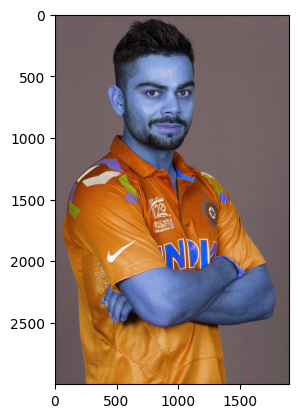

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(3000, 1898)

In [5]:
gray


array([[ 97,  97,  97, ..., 104, 104, 104],
       [ 97,  97,  97, ..., 104, 104, 104],
       [ 97,  97,  97, ..., 104, 104, 104],
       ...,
       [ 85,  85,  85, ...,  88,  87,  87],
       [ 85,  85,  85, ...,  88,  87,  87],
       [ 85,  85,  85, ...,  88,  86,  86]], dtype=uint8)

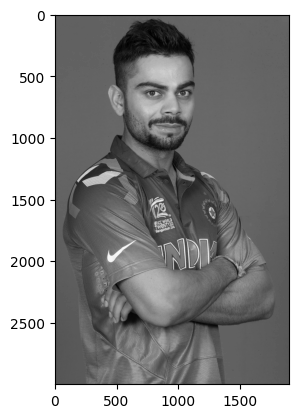

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
#using Harr cascades to detect eyes nose

In [8]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[530, 341, 729, 729]])

In [9]:
(x,y,w,h)=faces[0]
x,y,w,h

(530, 341, 729, 729)

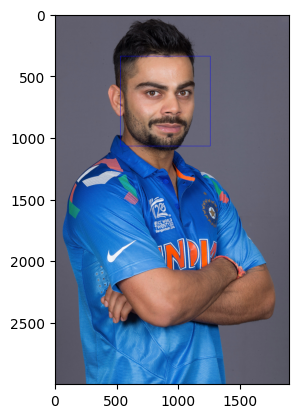

In [10]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
# plt.axis('off')  # Turn off axis
# plt.show()


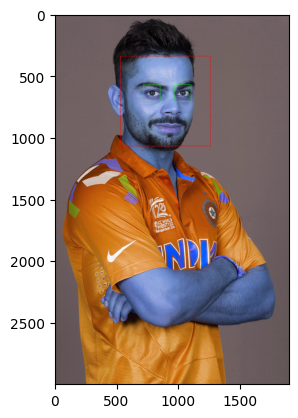

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

## (2) preprocessing: crop the facial region of the image

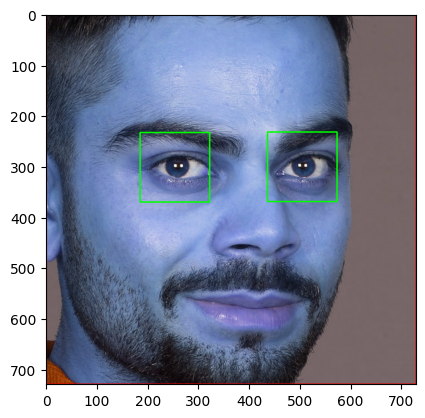

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')


In [ ]:
cropped_img=np.array(roi_color)
cropped_img.shape

##  (3)Processing : use wavelet transform as a feature for training our model
#### in wavelet transformed image ,you can see edges clearly and that can give us clues on various facial features such as eyes lips etc.


In [ ]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [ ]:

im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

## (3) PREPROCESSING : load image , detect face. If eyes>=2,then save and crop the face region 
#### a python function that cna take imput image and returns cropped image(if face and eyes>=2 are detected)

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

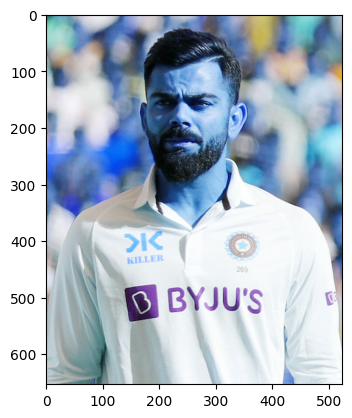

In [14]:
original_image=cv2.imread('./Virat_Kohli_during_the_India_vs_Aus_4th_Test_match_at_Narendra_Modi_Stadium_on_09_March_2023.jpg')
plt.imshow(original_image)

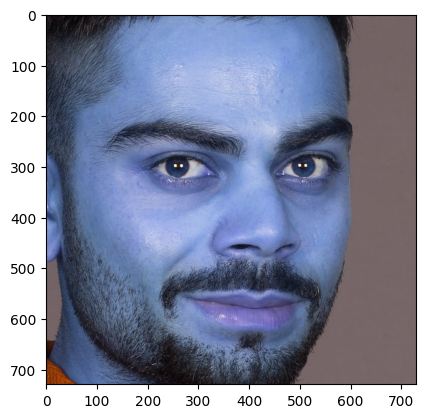

In [15]:
croped_image=get_cropped_image_if_2_eyes('./Virat_Kohli_during_the_India_vs_Aus_4th_Test_match_at_Narendra_Modi_Stadium_on_09_March_2023.jpg')
plt.imshow(croped_image)

In [16]:
path_to_data="./dataset/"
path_to_cr_data="./dataset/cropped/"

In [17]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/.ipynb_checkpoints',
 './dataset/cropped',
 './dataset/maria_sharapova',
 './dataset/messi',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
cropped_image_dirs=[]
celebrity_file_names_dict={}


for img_dir in img_dirs:
    print(img_dir)
    count=1
    sports_celebrity_name=img_dir.split('/')[-1]
    print(sports_celebrity_name)
    celebrity_file_names_dict[sports_celebrity_name]=[]
    for entry in os.scandir(img_dir):
        # path=img_dir+"/"+entr
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+sports_celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images in folder:",cropped_folder)
            cropped_file_name=sports_celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[sports_celebrity_name].append(cropped_file_path)
            count+=1

./dataset/.ipynb_checkpoints
.ipynb_checkpoints
./dataset/cropped
cropped
./dataset/maria_sharapova
maria_sharapova
generating cropped images in folder: ./dataset/cropped/maria_sharapova
./dataset/messi
messi
generating cropped images in folder: ./dataset/cropped/messi
./dataset/roger_federer
roger_federer
generating cropped images in folder: ./dataset/cropped/roger_federer
./dataset/serena_williams
serena_williams
generating cropped images in folder: ./dataset/cropped/serena_williams
./dataset/virat_kohli
virat_kohli
generating cropped images in folder: ./dataset/cropped/virat_kohli


###  manuallt examine cropped folder and delete any unwanted images

In [1]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

NameError: name 'cropped_image_dirs' is not defined

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

## 
Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [ ]:
len(X[0])

In [ ]:
32*32*3+ 32*32

In [ ]:
X[0]

In [ ]:
y[0]

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

chCV

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
best_estimators

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

In [ ]:
best_estimators['svm'].score(X_test,y_test)

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

# Save trained model

In [ ]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

# Save class dictionary

In [ ]:

import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))